
# SUPPLY CHAIN MANAGEMENT

INTRODUCTION

Supply chain management (SCM) is the process of managing the flow of goods and services to and from a business, including every step involved in turning raw materials and components into final products and getting them to the ultimate customer. Effective SCM can help streamline a company's activities to eliminate waste, maximize customer value, and gain a competitive advantage in the marketplace.
Supply chain management (SCM) is the centralized management of the flow of goods and services to and from a company and includes all of the processes involved in transforming raw materials and components into final products.By managing the supply chain, companies can cut excess costs and deliver products to the consumer faster and more efficiently.Good supply chain management can help prevent expensive product recalls and lawsuits as well as bad publicity. The five most critical phases of SCM are planning, sourcing, production, distribution, and returns.A supply chain manager is tasked with controlling and reducing costs and avoiding supply shortages.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Train Dataset

In [5]:
df=pd.read_csv('supply_train.csv')
df

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,...,1,119,NaN,2007.0,16,0,A,5,15,21103


# DATA EXPLORATION

In [6]:
df.shape

(16620, 25)

In [7]:
df.columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [8]:
#Dropping unwanted column "Unnamed"
df=df.drop(columns=["Unnamed: 0"])
df

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,4779,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,5718,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,4514,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,5829,...,1,119,NaN,2007.0,16,0,A,5,15,21103


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 16620 non-null  object 
 1   WH_Manager_ID                 16620 non-null  object 
 2   Location_type                 16620 non-null  object 
 3   WH_capacity_size              16620 non-null  object 
 4   zone                          16620 non-null  object 
 5   WH_regional_zone              16620 non-null  object 
 6   num_refill_req_l3m            16620 non-null  int64  
 7   transport_issue_l1y           16620 non-null  int64  
 8   Competitor_in_mkt             16620 non-null  int64  
 9   retail_shop_num               16620 non-null  int64  
 10  wh_owner_type                 16620 non-null  object 
 11  distributor_num               16620 non-null  int64  
 12  flood_impacted                16620 non-null  int64  
 13  f

In [9]:
df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,15953.000000,8760.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,2009.345320,17.127196,0.306137,3.491095,18.727377,22098.420096
std,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.842046,7.544672,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [7]:
df.dtypes

SI.NO                             int64
Ware_house_ID                    object
WH_Manager_ID                    object
Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
wh_est_year                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64


# Exploratory Data Analysis (EDA)

In [12]:
#Distribution of categorical variables
categorical_columns=df.select_dtypes(include=['object'])
for col in categorical_columns:
    print(df[col].value_counts())

Ware_house_ID
WH_100000    1
WH_111101    1
WH_111071    1
WH_111072    1
WH_111073    1
            ..
WH_105545    1
WH_105546    1
WH_105547    1
WH_105548    1
WH_116619    1
Name: count, Length: 16620, dtype: int64
WH_Manager_ID
EID_50000    1
EID_61101    1
EID_61071    1
EID_61072    1
EID_61073    1
            ..
EID_55545    1
EID_55546    1
EID_55547    1
EID_55548    1
EID_66619    1
Name: count, Length: 16620, dtype: int64
Location_type
Rural    15272
Urban     1348
Name: count, dtype: int64
WH_capacity_size
Large    6743
Mid      6691
Small    3186
Name: count, dtype: int64
zone
North    6800
West     5320
South    4223
East      277
Name: count, dtype: int64
WH_regional_zone
Zone 6    5568
Zone 5    3027
Zone 4    2756
Zone 2    1998
Zone 3    1937
Zone 1    1334
Name: count, dtype: int64
wh_owner_type
Company Owned    8975
Rented           7645
Name: count, dtype: int64
approved_wh_govt_certificate
C     3638
B+    3260
B     3220
A     3132
A+    2771
Name: count, dtyp

In [13]:
#Distribution of numerical variables
numerical_columns=df.select_dtypes(include=['int','float'])
for col in numerical_columns:
    print(df[col].value_counts())

num_refill_req_l3m
8    2032
3    1984
5    1967
7    1941
0    1900
4    1885
6    1857
1    1835
2    1219
Name: count, dtype: int64
transport_issue_l1y
0    10094
1     3072
2     1437
3     1272
4      508
5      237
Name: count, dtype: int64
Competitor_in_mkt
2     5790
3     4702
4     4438
5      825
6      375
1      291
7      136
8       49
10       6
9        6
12       1
0        1
Name: count, dtype: int64
retail_shop_num
4808    18
5022    17
4367    17
4611    16
4439    16
        ..
7176     1
3483     1
8522     1
7570     1
7347     1
Name: count, Length: 4356, dtype: int64
distributor_num
21    328
69    323
49    322
35    321
59    319
63    319
47    318
36    317
37    315
41    314
40    314
28    313
44    311
31    311
24    309
42    307
38    307
57    305
30    304
54    303
50    303
65    302
29    302
48    301
23    300
64    299
56    299
22    298
20    297
15    296
62    295
18    293
55    292
26    292
33    291
67    290
66    290
52    289
16  

# Data Preprocessing

In [14]:
#finding missing values
df.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [15]:
# Filling missing values with the median
df['workers_num']=df['workers_num'].fillna(df['workers_num'].median())
df['wh_est_year']=df['wh_est_year'].fillna(df['wh_est_year'].median())
# Filling missing values with a default category or mode
df['approved_wh_govt_certificate'].fillna('NIL', inplace=True)  
df.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [16]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)
df

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,2009.0,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,2009.0,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,2009.0,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,2009.0,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,4779,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,5718,...,1,164,30.0,2009.0,17,0,B+,6,24,21113
16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,4514,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,5829,...,1,119,28.0,2007.0,16,0,A,5,15,21103


# Correlation Matrix

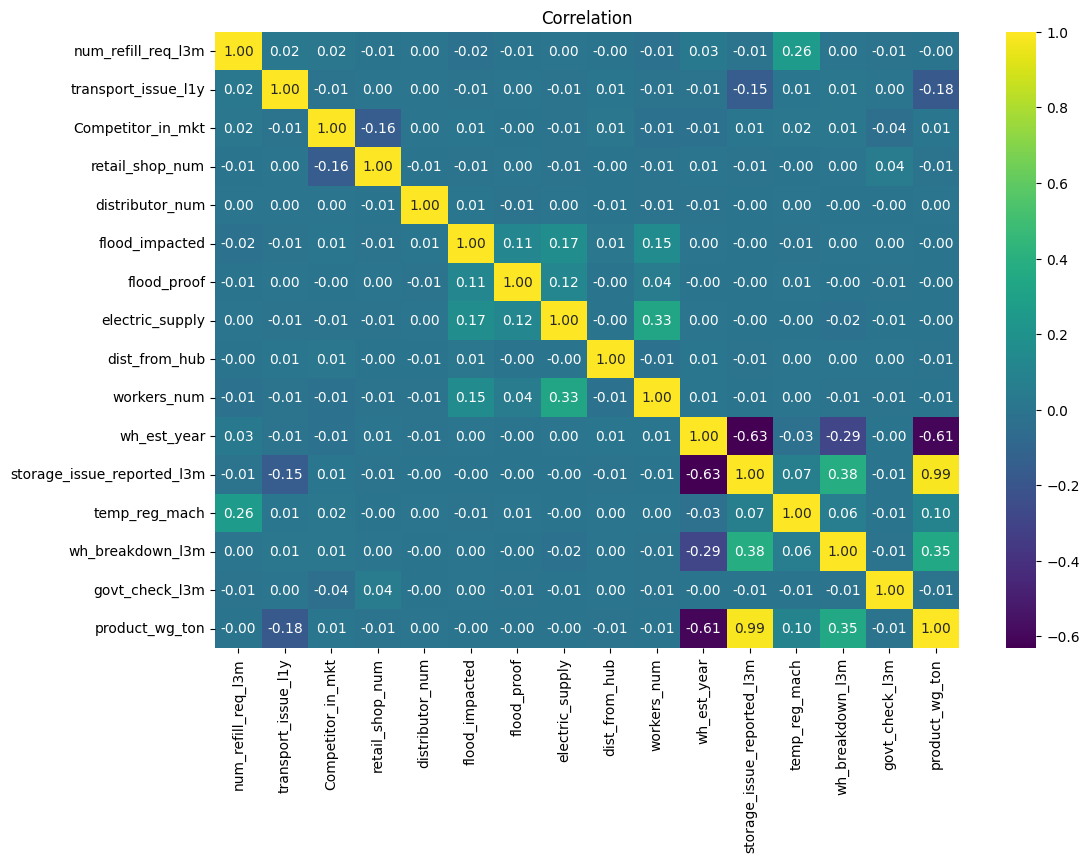

In [17]:
# Select only numerical columns for correlation analysis
numerical_columns=df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix for numerical columns
corr_matrix=numerical_columns.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation')
plt.show()

Correlation heatmap shows the relationships between numerical variables. There is a strong positive correlation between storage_issue_reported_l3m and product_wg_ton.

# Data Visualization

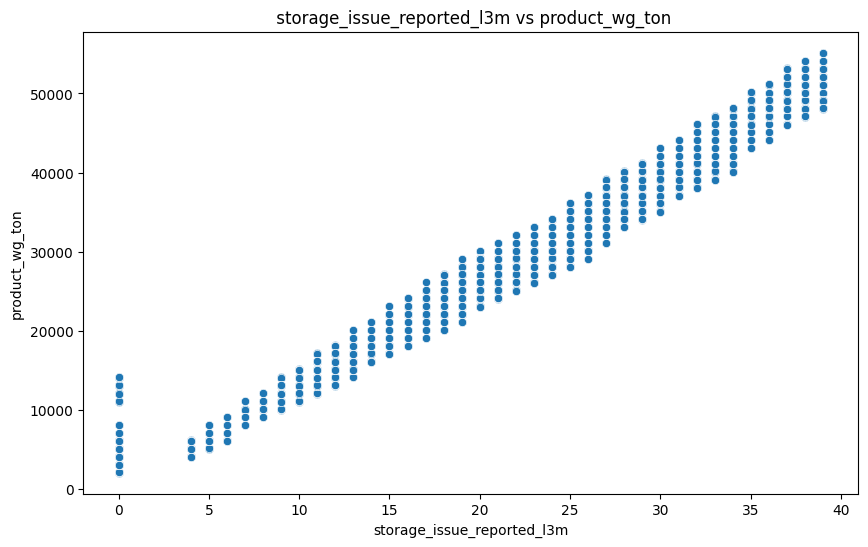

In [19]:
#Scatter plot with storage_issue_reported_l3m vs product_wg_ton which is showing strong correlation
plt.figure(figsize=(10,6))
sns.scatterplot(x="storage_issue_reported_l3m",y="product_wg_ton",data=df)
plt.title(" storage_issue_reported_l3m vs product_wg_ton")
plt.xlabel("storage_issue_reported_l3m")
plt.ylabel("product_wg_ton")
plt.show()

The data points are clustered close together and form a line that slopes upwards, indicating that there is a strong positive correlation between storage_issue_reported_l3m and product_wg_ton. This means that as storage_issue_reported_l3m increases, product_wg_ton also tends to increases.

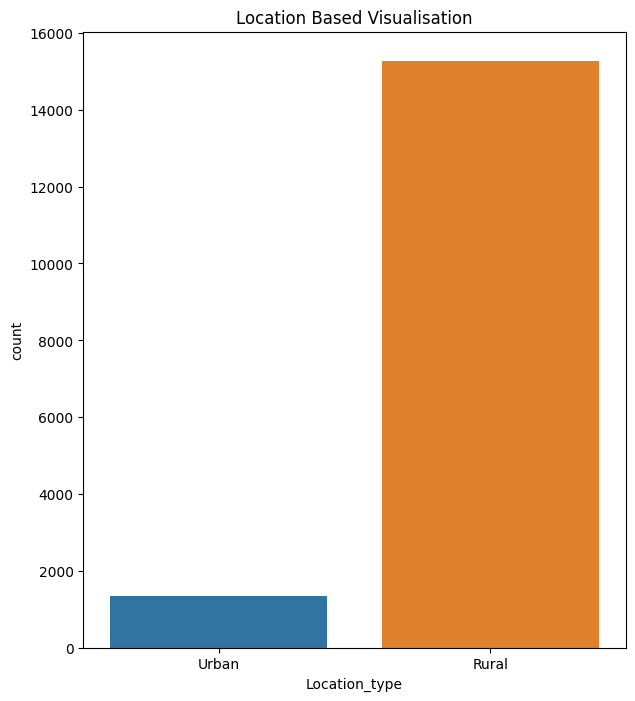

In [20]:
plt.figure(figsize=(7,8))
sns.countplot(x='Location_type',data=df)
plt.title("Location Based Visualisation")
plt.show()

Urban locations have smaller warehouses compared to rural areas. 

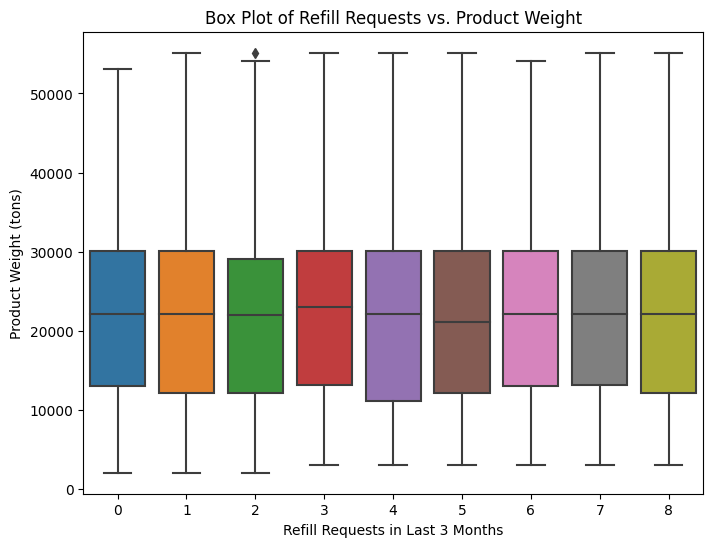

In [21]:
# Explore relationships between numerical variables and the target variable
plt.figure(figsize=(8, 6))
sns.boxplot(x='num_refill_req_l3m', y='product_wg_ton', data=df)
plt.title('Box Plot of Refill Requests vs. Product Weight')
plt.xlabel('Refill Requests in Last 3 Months')
plt.ylabel('Product Weight (tons)')
plt.show()

 From this boxplot we cannot find any strong relationships between "num_refill_req_l3m" and "product_wg_ton."

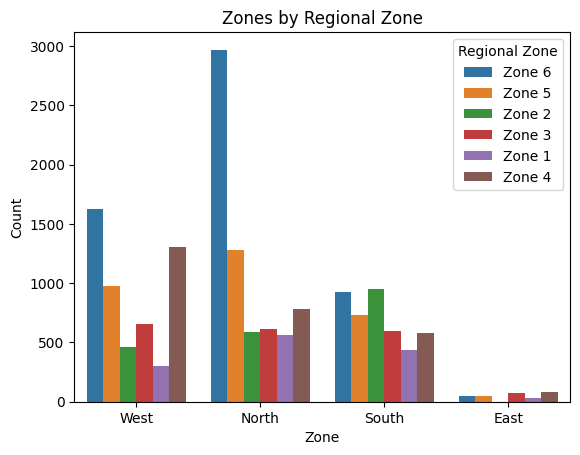

In [22]:
# Explore the distribution of 'zone' and 'WH_regional_zone'
plt.figure
sns.countplot(data=df, x='zone', hue='WH_regional_zone')
plt.title('Zones by Regional Zone')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.legend(title='Regional Zone')
plt.show()

This countplot shows the distributions of warehouse zone across different regional zones.Regional zone6 is showing the highest count of warehouses.

# Data Encoding

In [23]:
# Filter the columns with non-numeric data types
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Convert variables using Label Encoding
label_encoder = LabelEncoder()
categorical_variables = ['Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate']
for col in categorical_variables:
    df[col] = label_encoder.fit_transform(df[col])
df

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,1,2,3,5,3,1,2,4651,...,1,91,29.0,2009.0,13,0,0,5,15,17115
1,WH_100001,EID_50001,0,0,1,4,0,0,4,6217,...,1,210,31.0,2009.0,4,0,0,3,17,5074
2,WH_100002,EID_50002,0,1,2,1,1,0,4,4306,...,0,161,37.0,2009.0,17,0,0,6,22,23137
3,WH_100003,EID_50003,0,1,1,2,7,4,2,6000,...,0,103,21.0,2009.0,17,1,1,3,27,22115
4,WH_100004,EID_50004,0,0,1,4,3,1,2,4740,...,1,112,25.0,2009.0,18,0,4,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,WH_116615,EID_66615,1,0,3,5,3,1,6,4779,...,0,240,19.0,2009.0,14,0,3,5,23,16094
16616,WH_116616,EID_66616,1,0,1,4,2,0,2,5718,...,1,164,30.0,2009.0,17,0,3,6,24,21113
16617,WH_116617,EID_66617,0,0,1,5,5,0,4,4514,...,1,211,24.0,2003.0,24,1,2,5,29,28117
16618,WH_116618,EID_66618,0,2,3,5,3,2,3,5829,...,1,119,28.0,2007.0,16,0,0,5,15,21103


In [25]:
#Removing unwanted columns for creating machine learning models.
df1=df.drop(["Ware_house_ID","WH_Manager_ID"],axis=1)
df1

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,...,1,91,29.0,2009.0,13,0,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,...,1,210,31.0,2009.0,4,0,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,...,0,161,37.0,2009.0,17,0,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,...,0,103,21.0,2009.0,17,1,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,...,1,112,25.0,2009.0,18,0,4,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,1,0,3,5,3,1,6,4779,1,70,...,0,240,19.0,2009.0,14,0,3,5,23,16094
16616,1,0,1,4,2,0,2,5718,0,26,...,1,164,30.0,2009.0,17,0,3,6,24,21113
16617,0,0,1,5,5,0,4,4514,0,50,...,1,211,24.0,2003.0,24,1,2,5,29,28117
16618,0,2,3,5,3,2,3,5829,1,59,...,1,119,28.0,2007.0,16,0,0,5,15,21103


# Train Test Split

In [26]:
X_train=df1.drop(["product_wg_ton"],axis=1)
X_train.shape

(16620, 21)

In [27]:
y_train=df1['product_wg_ton']
y_train

0        17115
1         5074
2        23137
3        22115
4        24071
         ...  
16615    16094
16616    21113
16617    28117
16618    21103
16619    38097
Name: product_wg_ton, Length: 16620, dtype: int64

# Test Dataset 

In [28]:
#Data Preprocessing
df2=pd.read_csv("supply_test.csv")
df2

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
5525,22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,3,1,3,...,0,170,NaN,NaN,26,0,C,5,9,33108
5526,22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,...,0,99,22.0,NaN,20,0,B+,6,4,24072
5527,22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,6,2,4,...,0,220,17.0,NaN,13,0,B,3,28,15055


In [29]:
#Dropping unwanted column "Unnamed"
df2=df2.drop(columns=["Unnamed: 0"])
df2

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,5590,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,5856,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,4803,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,4784,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,3699,...,0,205,20.0,1999.0,25,0,B,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,5030,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
5525,WH_122146,EID_72146,Rural,Small,South,Zone 6,3,1,3,4320,...,0,170,NaN,NaN,26,0,C,5,9,33108
5526,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,5268,...,0,99,22.0,NaN,20,0,B+,6,4,24072
5527,WH_122148,EID_72148,Rural,Large,North,Zone 6,6,2,4,4378,...,0,220,17.0,NaN,13,0,B,3,28,15055


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 5529 non-null   object 
 1   WH_Manager_ID                 5529 non-null   object 
 2   Location_type                 5529 non-null   object 
 3   WH_capacity_size              5529 non-null   object 
 4   zone                          5529 non-null   object 
 5   WH_regional_zone              5529 non-null   object 
 6   num_refill_req_l3m            5529 non-null   int64  
 7   transport_issue_l1y           5529 non-null   int64  
 8   Competitor_in_mkt             5529 non-null   int64  
 9   retail_shop_num               5529 non-null   int64  
 10  wh_owner_type                 5529 non-null   object 
 11  distributor_num               5529 non-null   int64  
 12  flood_impacted                5529 non-null   int64  
 13  flo

In [31]:
df2.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5319.000000,2844.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000
mean,4.007235,0.765600,3.106167,4980.695424,42.128052,0.104178,0.049919,0.657262,163.899982,29.010528,2009.572785,17.085549,0.298426,3.477302,18.892205,22052.334599
std,2.604325,1.187567,1.128396,1049.617325,15.959934,0.305519,0.217797,0.474668,62.544704,7.848478,7.473201,9.206551,0.457609,1.700717,8.716737,11645.738485
min,0.000000,0.000000,1.000000,1953.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4310.000000,28.000000,0.000000,0.000000,0.000000,110.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,12143.000000
50%,4.000000,0.000000,3.000000,4863.000000,42.000000,0.000000,0.000000,1.000000,165.000000,28.000000,2010.000000,17.000000,0.000000,3.000000,21.000000,22099.000000
75%,6.000000,1.000000,4.000000,5492.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30099.000000
max,8.000000,5.000000,9.000000,10846.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55144.000000


In [32]:
df2.dtypes

Ware_house_ID                    object
WH_Manager_ID                    object
Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
wh_est_year                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64
dtype: object

In [33]:
df2.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [34]:
# Filling missing values with the median
df2['workers_num']=df2['workers_num'].fillna(df2['workers_num'].median())
df2['wh_est_year']=df2['wh_est_year'].fillna(df2['wh_est_year'].median())
# Filling missing values with a default category or mode
df2['approved_wh_govt_certificate'].fillna('NIL', inplace=True)  
df2.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [35]:
#Data Encoding
# Filter the columns with non-numeric data types
categorical_columns = df2.select_dtypes(include=['object']).columns
categorical_columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Convert variables using Label Encoding
label_encoder = LabelEncoder()
categorical_variables = ['Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate']
for col in categorical_variables:
    df2[col] = label_encoder.fit_transform(df2[col])
df2

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_116621,EID_66621,0,0,1,4,5,0,3,5590,...,0,156,30.0,2006.0,24,0,0,2,5,30132
1,WH_116622,EID_66622,0,0,1,4,5,0,2,5856,...,1,79,31.0,2019.0,5,1,4,2,24,6075
2,WH_116623,EID_66623,0,2,1,5,3,0,3,4803,...,1,70,41.0,2008.0,19,1,1,5,9,24076
3,WH_116624,EID_66624,0,1,3,3,5,2,2,4784,...,1,255,33.0,2017.0,9,1,1,3,11,13092
4,WH_116625,EID_66625,1,1,1,3,6,0,4,3699,...,0,205,20.0,1999.0,25,0,2,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,WH_122145,EID_72145,0,0,1,5,8,1,3,5030,...,1,203,28.0,2007.0,22,1,1,2,4,29138
5525,WH_122146,EID_72146,0,2,2,5,3,1,3,4320,...,0,170,28.0,2010.0,26,0,4,5,9,33108
5526,WH_122147,EID_72147,0,0,1,5,7,2,2,5268,...,0,99,22.0,2010.0,20,0,3,6,4,24072
5527,WH_122148,EID_72148,0,0,1,5,6,2,4,4378,...,0,220,17.0,2010.0,13,0,2,3,28,15055


In [37]:
#Removing unwanted columns for creating machine learning models.
df3=df2.drop(["Ware_house_ID","WH_Manager_ID"],axis=1)
df3

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,0,1,4,5,0,3,5590,0,15,...,0,156,30.0,2006.0,24,0,0,2,5,30132
1,0,0,1,4,5,0,2,5856,0,40,...,1,79,31.0,2019.0,5,1,4,2,24,6075
2,0,2,1,5,3,0,3,4803,1,40,...,1,70,41.0,2008.0,19,1,1,5,9,24076
3,0,1,3,3,5,2,2,4784,1,15,...,1,255,33.0,2017.0,9,1,1,3,11,13092
4,1,1,1,3,6,0,4,3699,1,24,...,0,205,20.0,1999.0,25,0,2,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,0,0,1,5,8,1,3,5030,1,46,...,1,203,28.0,2007.0,22,1,1,2,4,29138
5525,0,2,2,5,3,1,3,4320,1,60,...,0,170,28.0,2010.0,26,0,4,5,9,33108
5526,0,0,1,5,7,2,2,5268,0,64,...,0,99,22.0,2010.0,20,0,3,6,4,24072
5527,0,0,1,5,6,2,4,4378,1,32,...,0,220,17.0,2010.0,13,0,2,3,28,15055


In [38]:
#Train Test Split
X_test=df3.drop(["product_wg_ton"],axis=1)
X_test.shape

(5529, 21)

In [39]:
y_test=df3["product_wg_ton"]
y_test

0       30132
1        6075
2       24076
3       13092
4       29071
        ...  
5524    29138
5525    33108
5526    24072
5527    15055
5528    14103
Name: product_wg_ton, Length: 5529, dtype: int64

# Model Selection And Training

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1.Random Forest Regressor

In [41]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
y_pred

array([30917.51,  6691.23, 24982.68, ..., 23479.18, 15367.89, 13882.67])

In [43]:
#Evaluating model's performance
mse=mean_squared_error(y_pred,y_test)
r2score=r2_score(y_pred,y_test)
msa=mean_absolute_error(y_pred,y_test)
print("mean square error = ",mse)
print("mean absolute error = ",msa)
print("r2 score = ",r2score)

mean square error =  840047.372569217
mean absolute error =  683.0551745342739
r2 score =  0.9938075839021027


# 2.Decision Tree Regressor

In [47]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
y_pred

array([30106.,  7140., 24148., ..., 23061., 15135., 14094.])

In [49]:
#Evaluating model's performance
mse=mean_squared_error(y_pred,y_test)
r2score=r2_score(y_pred,y_test)
msa=mean_absolute_error(y_pred,y_test)
print("mean square error = ",mse)
print("mean absolute error = ",msa)
print("r2 score = ",r2score)

mean square error =  1562516.4369687105
mean absolute error =  837.0305661059866
r2 score =  0.9885262091399156


# 3.Linear Regressor

In [50]:
Lr=LinearRegression()
Lr.fit(X_train,y_train)
y_pred=Lr.predict(X_test)
y_pred

array([31045.16451053,  8191.04890223, 25053.43125272, ...,
       24652.4732326 , 16334.04454806, 13054.1600184 ])

In [52]:
#Evaluating model's performance
mse=mean_squared_error(y_pred,y_test)
r2score=r2_score(y_pred,y_test)
msa=mean_absolute_error(y_pred,y_test)
print("mean square error = ",mse)
print("mean absolute error = ",msa)
print("r2 score = ",r2score)

mean square error =  3092997.0317738103
mean absolute error =  1303.6993291252022
r2 score =  0.9767368018646007


# 4. AddaBoost Regressor

In [53]:
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
y_pred

array([30615.70540383,  7857.59637188, 25229.68610422, ...,
       26086.37823372, 17372.12370311, 13570.81484794])

In [54]:
#Evaluating model's performance
mse=mean_squared_error(y_pred,y_test)
msa=mean_absolute_error(y_pred,y_test)
r2score=r2_score(y_pred,y_test)
print("mean square error = ",mse)
print("mean absolute error = ",msa)
print("r2 score = ",r2score)

mean square error =  3127002.440938234
mean absolute error =  1423.1772833783214
r2 score =  0.9760729418867989


# 5.Gradient Boost Regressor 

In [55]:
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
y_pred

array([30966.48678957,  6934.26199558, 25603.561988  , ...,
       23554.01466975, 15292.0876425 , 13995.05716719])

In [57]:
#Evaluating model's performance
mse=mean_squared_error(y_pred,y_test)
r2score=r2_score(y_pred,y_test)
msa=mean_absolute_error(y_pred,y_test)
print("mean square error = ",mse)
print("mean absolute error = ",msa)
print("r2 score = ",r2score)

mean square error =  828181.7936730888
mean absolute error =  699.06139176542
r2 score =  0.9939247277486309


# Conclusion

In conclusion, our machine learning model has made significant strides in optimizing the supply chain for our FMCG company.After thoroughly exploring and evaluating different models including AdaBoost Regressor, Decision Tree Regressor, Random Forest, Linear Regression, and Gradient Boosting Regressor, it has been determined that the Gradient Boosting Regressor model stands out as the most effective choices as the Gradient Boosting Regressor is having the highest r2 score and lowest mean square error and mean absolute error indicating its accurancy in predicting product weights.The second best model is the Random forest regressor.


# Recommendations

1. it is recommended to use the Random Forest Regressor model into the company's supply chain management system. This will enable real-time decision-making and automatic adjustments in product weight allocations to minimize inventory costs.
2. Manage key features of the model i.e "num_refill_req_l3m","retail_shop_num"and "dist_from_hub." These variables have a significant impact on product weight predictions.

Implementation of these recommendations can lead to cost savings, improved profitability, and more efficient inventory management.

